# ECG : Image to Waveform

### Replicating the paper "High Precision Digitization of Paper-Based ECG Records: A Step Toward Machine Learning" with different ECG data

https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=8894038

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from os.path import exists

from PIL import Image
from pdf2image import convert_from_path
import cv2

### User defined
import ecg

%load_ext autoreload
%autoreload 2

### Change a pdf to png

For a given file name, convert it to png if it does not already exist in that format:

In [2]:
file = '265_barrera_21673'     # Base case, simple example
# file = '40_lomelin_23217'      # Another simple example
# file = '225_morales_21965'     # Pronounced peaks
# file = '103_cianca_22807'      # Pronounced peaks
# file = '56_delaconcha_23131'   # Double long signal (this one failed on top crop)
# file = '155_gracida_22450'     # Weird V5 signal

pdf_path = f'../documentos/ecgs/inc/pdf/{file}.pdf'
png_path = f'../documentos/ecgs/inc/png/{file}.png'

file_exists = exists(f'../documentos/ecgs/inc/png/{file}.png')
if not file_exists:
    pdf = convert_from_path(pdf_path, dpi=500)
    pdf[0].save(png_path, 'PNG')

Open png as numpy

In [3]:
img = Image.open(png_path)
imx = np.array(img)
imx = imx[:,:,0]
imx = np.rot90(imx, k=3)

We take a look at the image:

In [9]:
imx.shape
imx

array([[232, 232, 238, ..., 222, 224, 220],
       [234, 234, 240, ..., 225, 222, 216],
       [236, 240, 242, ..., 224, 222, 217],
       ...,
       [242, 245, 244, ..., 241, 241, 241],
       [242, 245, 243, ..., 240, 242, 243],
       [244, 245, 247, ..., 240, 241, 241]], dtype=uint8)

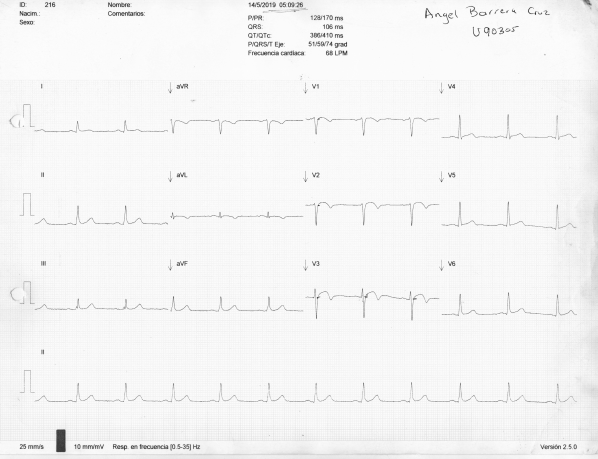

In [4]:
im = Image.fromarray(imx)
im.reduce(ecg.img_factor)    

We take a look at the horizontally scanned variance to detect changes in image saturation:

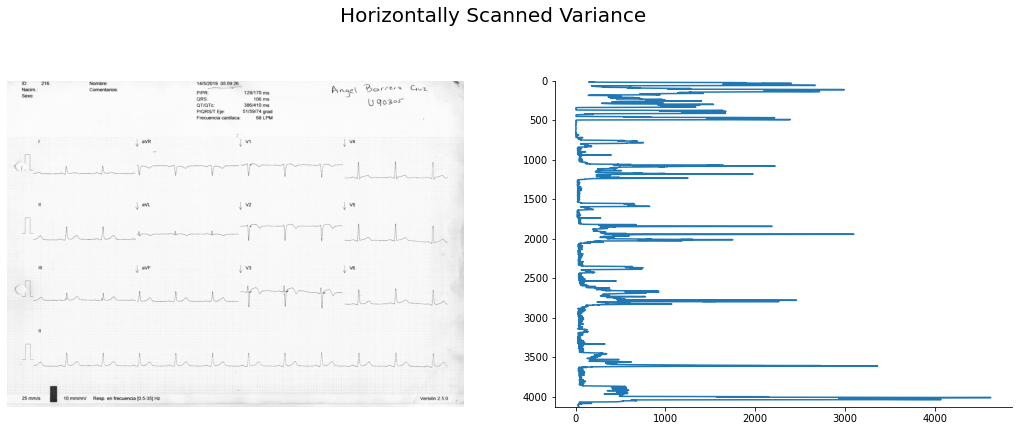

In [117]:
### Previous calculations and definitions
h_var = imx.var(1)

### Plot
fig, ax = plt.subplots(1,2,figsize = (18,6))

### Image
ax[0].imshow(im.reduce(2), cmap='gray', aspect='auto')
ax[0].get_xaxis().set_visible(False)
ax[0].get_yaxis().set_visible(False)
[ax[0].spines[spine].set_visible(False) for spine in ax[0].spines];

### Variance
ax[1].plot(h_var[::-1], range(imx.shape[0])[::-1])
ax[1].invert_yaxis()
ax[1].margins(y=0)
ax[0].get_xaxis().set_visible(False)
[ax[1].spines[spine].set_visible(False) for spine in ['right', 'top']];

### Title
plt.suptitle('Horizontally Scanned Variance', fontsize = 20, y = 1.05);

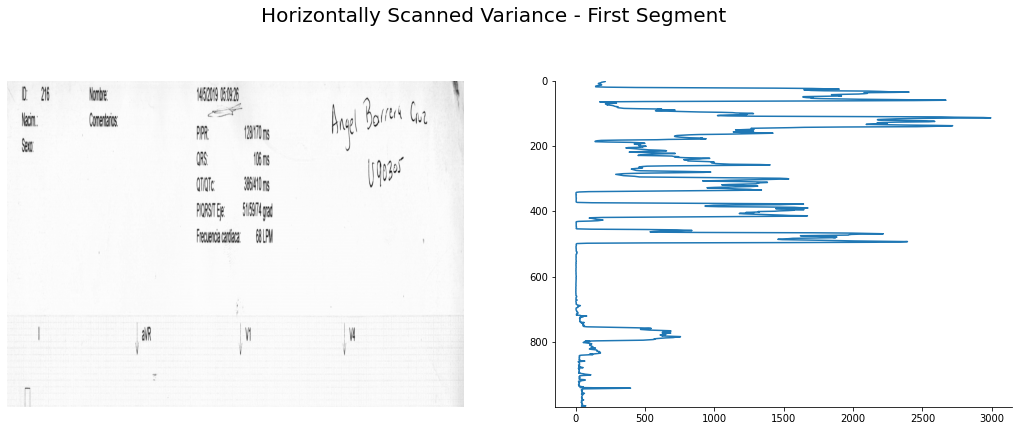

In [118]:
### Previous calculations and definitions
pqrst_segment = 1000 # Approx
h_var = imx[:pqrst_segment].var(1)
imx_temp = imx[:pqrst_segment]
im_temp = Image.fromarray(imx_temp)

### Plot
fig, ax = plt.subplots(1,2,figsize = (18,6))

### Image
ax[0].imshow(im_temp.reduce(2), cmap='gray', aspect='auto')
ax[0].get_xaxis().set_visible(False)
ax[0].get_yaxis().set_visible(False)
[ax[0].spines[spine].set_visible(False) for spine in ax[0].spines];

### Variance
ax[1].plot(h_var[::-1], range(imx_temp.shape[0])[::-1])
ax[1].invert_yaxis()
ax[1].margins(y=0)
ax[0].get_xaxis().set_visible(False)
[ax[1].spines[spine].set_visible(False) for spine in ['right', 'top']];

### Title
plt.suptitle('Horizontally Scanned Variance - First Segment', fontsize = 20, y = 1.05);

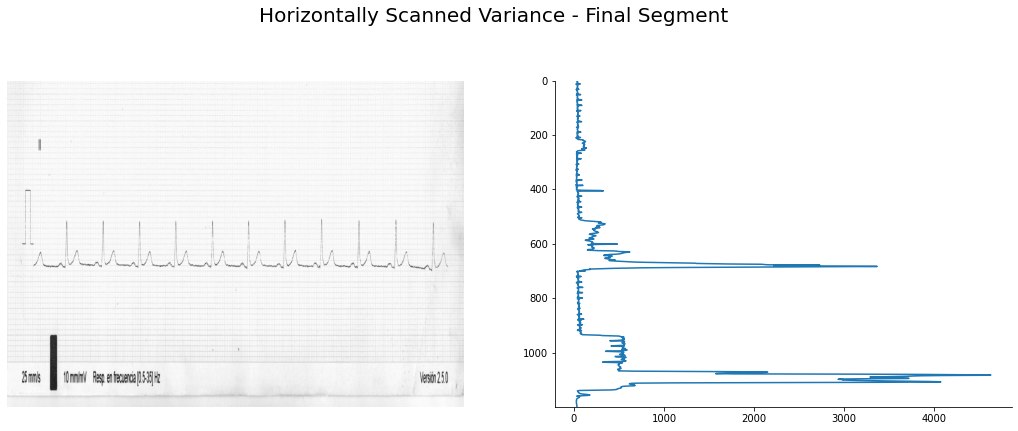

In [119]:
### Previous calculations and definitions
final_segment = 1200 # Approx
h_var = imx[-final_segment:].var(1)
imx_temp = imx[-final_segment:]
im_temp = Image.fromarray(imx_temp)

### Plot
fig, ax = plt.subplots(1,2,figsize = (18,6))

### Image
ax[0].imshow(im_temp.reduce(2), cmap='gray', aspect='auto')
ax[0].get_xaxis().set_visible(False)
ax[0].get_yaxis().set_visible(False)
[ax[0].spines[spine].set_visible(False) for spine in ax[0].spines];

### Variance
ax[1].plot(h_var[::-1], range(imx_temp.shape[0])[::-1])
ax[1].invert_yaxis()
ax[1].margins(y=0)
ax[0].get_xaxis().set_visible(False)
[ax[1].spines[spine].set_visible(False) for spine in ['right', 'top']];

### Title
plt.suptitle('Horizontally Scanned Variance - Final Segment', fontsize = 20, y = 1.05);

We also take a look at the lag-1 differences:

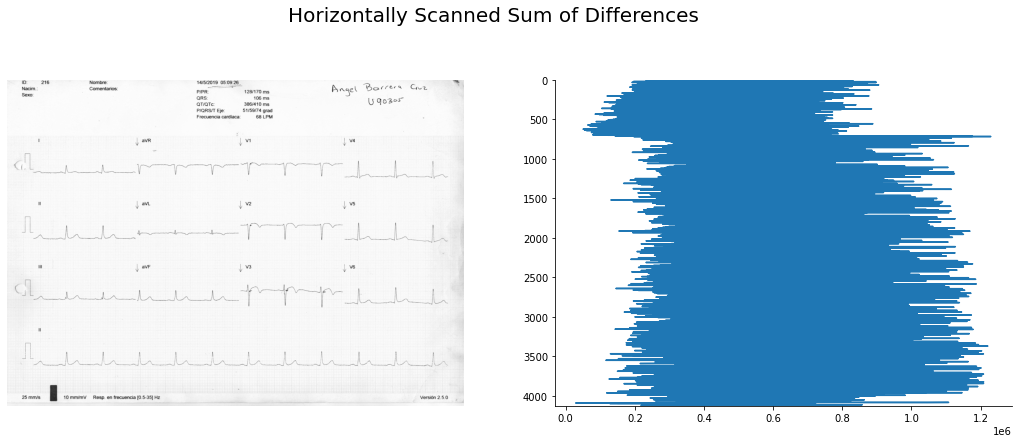

In [120]:
### Previous calculations and definitions
imx_diff = imx[1:,:] - imx[:-1,:]
diff_sums = imx_diff.sum(1)

### Plot
fig, ax = plt.subplots(1,2,figsize = (18,6))

### Image
ax[0].imshow(im.reduce(2), cmap='gray', aspect='auto')
ax[0].get_xaxis().set_visible(False)
ax[0].get_yaxis().set_visible(False)
[ax[0].spines[spine].set_visible(False) for spine in ax[0].spines];

### Variance
ax[1].plot(diff_sums[::-1], range(diff_sums.shape[0])[::-1])
ax[1].invert_yaxis()
ax[1].margins(y=0)
ax[0].get_xaxis().set_visible(False)
[ax[1].spines[spine].set_visible(False) for spine in ['right', 'top']];

### Title
plt.suptitle('Horizontally Scanned Sum of Differences', fontsize = 20, y = 1.05);

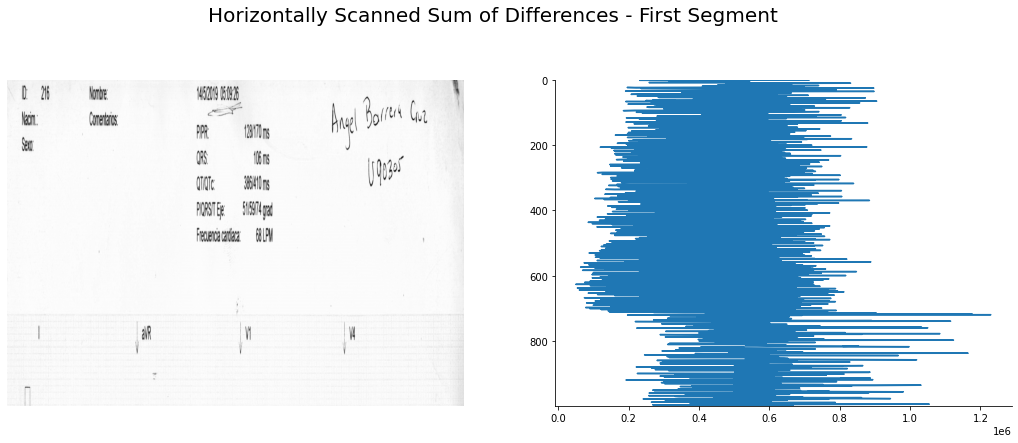

In [121]:
### Previous calculations and definitions
pqrst_segment = 1000 # Approx
imx_diff = imx[1:,:] - imx[:-1,:]
diff_sums = imx_diff[:pqrst_segment].sum(1)
imx_temp = imx[:pqrst_segment]
im_temp = Image.fromarray(imx_temp)

### Plot
fig, ax = plt.subplots(1,2,figsize = (18,6))

### Image
ax[0].imshow(im_temp.reduce(2), cmap='gray', aspect='auto')
ax[0].get_xaxis().set_visible(False)
ax[0].get_yaxis().set_visible(False)
[ax[0].spines[spine].set_visible(False) for spine in ax[0].spines];

### Variance
ax[1].plot(diff_sums[::-1], range(diff_sums.shape[0])[::-1])
ax[1].invert_yaxis()
ax[1].margins(y=0)
ax[0].get_xaxis().set_visible(False)
[ax[1].spines[spine].set_visible(False) for spine in ['right', 'top']];

### Title
plt.suptitle('Horizontally Scanned Sum of Differences - First Segment', fontsize = 20, y = 1.05);

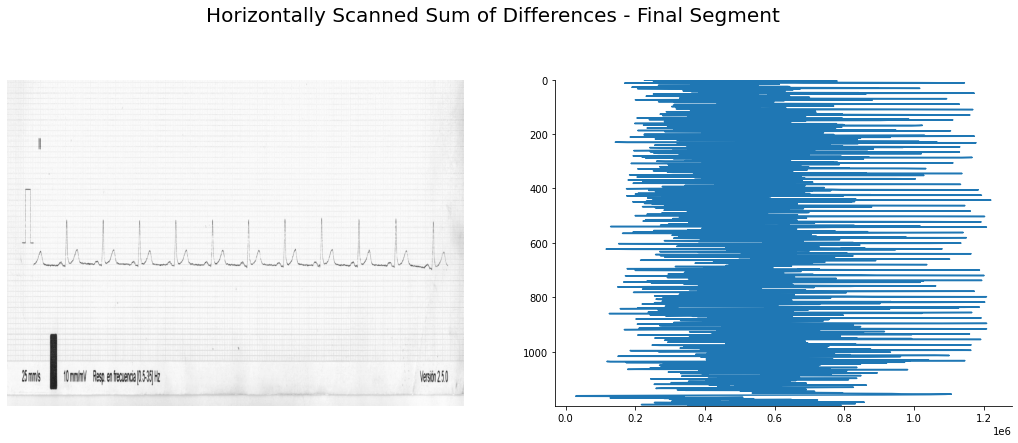

In [122]:
### Previous calculations and definitions
final_segment = 1200 # Approx
imx_diff = imx[1:,:] - imx[:-1,:]
diff_sums = imx_diff[-final_segment:].sum(1)
imx_temp = imx[-final_segment:]
im_temp = Image.fromarray(imx_temp)

### Plot
fig, ax = plt.subplots(1,2,figsize = (18,6))

### Image
ax[0].imshow(im_temp.reduce(2), cmap='gray', aspect='auto')
ax[0].get_xaxis().set_visible(False)
ax[0].get_yaxis().set_visible(False)
[ax[0].spines[spine].set_visible(False) for spine in ax[0].spines];

### Variance
ax[1].plot(diff_sums[::-1], range(diff_sums.shape[0])[::-1])
ax[1].invert_yaxis()
ax[1].margins(y=0)
ax[0].get_xaxis().set_visible(False)
[ax[1].spines[spine].set_visible(False) for spine in ['right', 'top']];

### Title
plt.suptitle('Horizontally Scanned Sum of Differences - Final Segment', fontsize = 20, y = 1.05);

### Cropping relevant sections

We can start cropping the image having observed certain behaviours:

In [123]:
### Previous calculations and definitions
h_var = imx.var(1)
imx_diff = imx[1:,:] - imx[:-1,:]
diff_sums = imx_diff.sum(1)
diff_sums = (diff_sums - diff_sums.mean())/diff_sums.std()

#### Crop PQRST segment

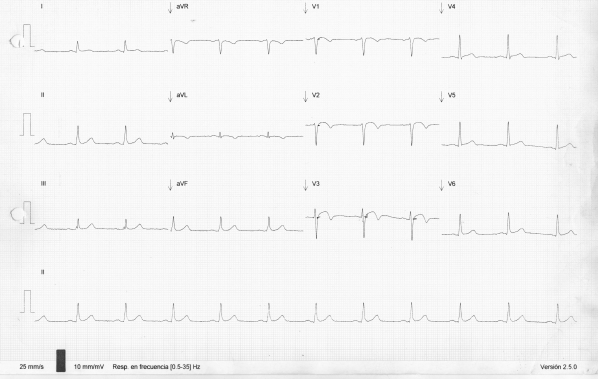

In [124]:
# if diff_sums[:1000].max() > -diff_sums[:1000].min():
#     crop_after_pqrst = diff_sums[:1000].argmax()
# else:
#     crop_after_pqrst = diff_sums[:1000].argmin()
crop_after_pqrst = np.abs(diff_sums[1:1000] - diff_sums[0:999]).argmax()

im1 = Image.fromarray(imx[crop_after_pqrst:,:])
im1.reduce(ecg.img_factor)

#### Crop final segment

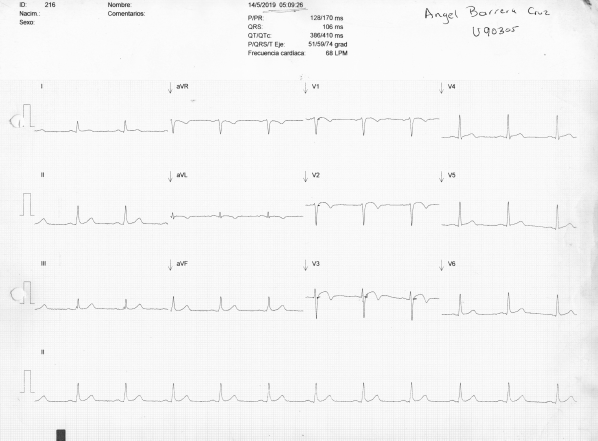

In [125]:
final_segment = 300 #Approx
avoid_text = 50 #Approx
final_text = h_var[-final_segment:].argmax()
crop_before_end = imx.shape[0] - final_segment + final_text - avoid_text

im2 = Image.fromarray(imx[:crop_before_end,:])
im2.reduce(ecg.img_factor)

#### Both

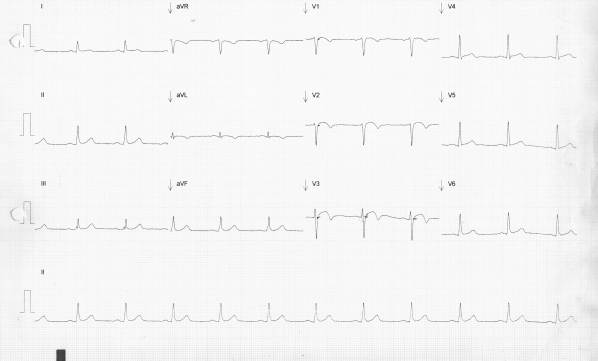

In [126]:
if diff_sums[:1000].max() > -diff_sums[:1000].min():
    crop_after_pqrst = diff_sums[:1000].argmax()
else:
    crop_after_pqrst = diff_sums[:1000].argmin()
crop_after_pqrst = np.abs(diff_sums[1:1000] - diff_sums[0:999]).argmax()
    
final_segment = 300 #Approx
avoid_text = 50
final_text = h_var[-final_segment:].argmax()
crop_before_end = imx.shape[0] - final_segment + final_text - avoid_text

im3 = Image.fromarray(imx[crop_after_pqrst:crop_before_end,:])
im3.reduce(ecg.img_factor)

### Separating 12 lead

In [127]:
clean_imx = imx[crop_after_pqrst:crop_before_end,:]
clean_im = Image.fromarray(clean_imx)

We take a look at the vertically scanned variance to detect changes in image saturation:

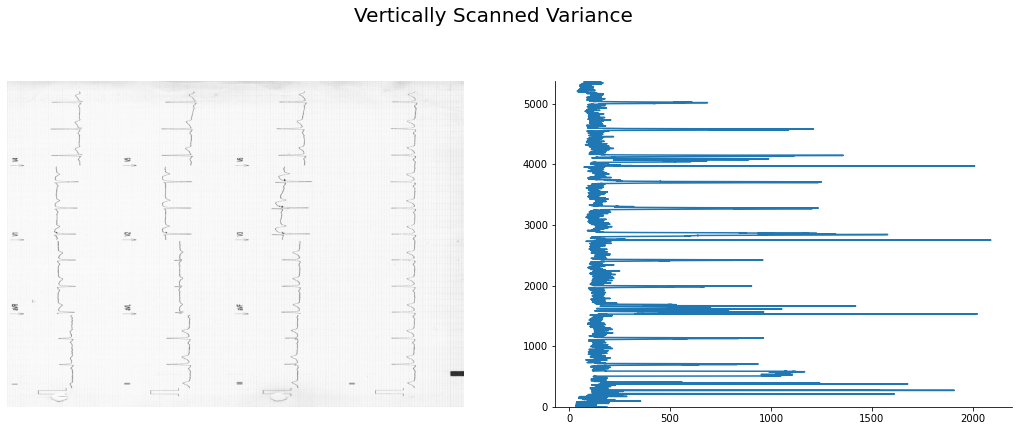

In [128]:
### Previous calculations and definitions
h_var = clean_imx.var(0)
imx_temp = clean_imx
im_temp = Image.fromarray(imx_temp)

### Plot
fig, ax = plt.subplots(1,2,figsize = (18,6))

### Image
ax[0].imshow(im_temp.reduce(2).rotate(90, expand=True), cmap='gray', aspect='auto')
ax[0].get_xaxis().set_visible(False)
ax[0].get_yaxis().set_visible(False)
[ax[0].spines[spine].set_visible(False) for spine in ax[0].spines];

### Variance
ax[1].plot(h_var[::-1], range(imx_temp.shape[1])[::-1])
# ax[1].invert_yaxis()
ax[1].margins(y=0)
ax[0].get_xaxis().set_visible(False)
[ax[1].spines[spine].set_visible(False) for spine in ['right', 'top']];

### Title
plt.suptitle('Vertically Scanned Variance', fontsize = 20, y = 1.05);

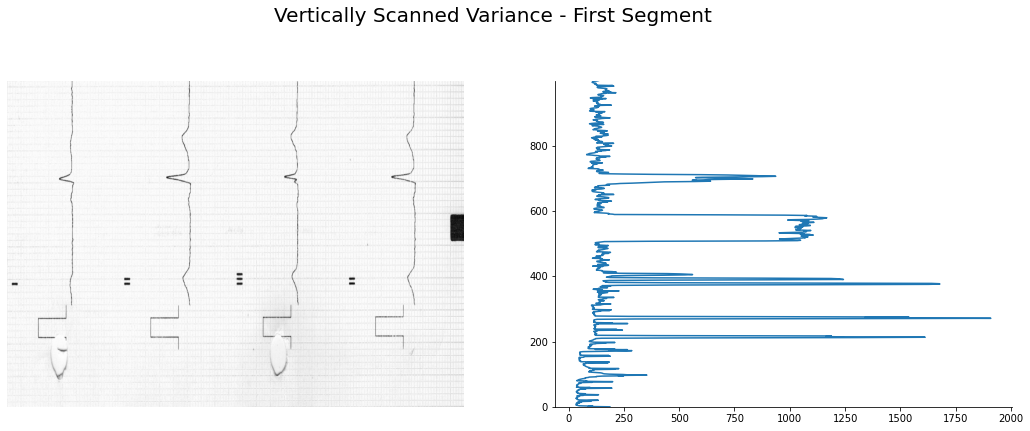

In [129]:
### Previous calculations and definitions
segment = 1000 # Approx
h_var = clean_imx[:, :segment].var(0)
imx_temp = clean_imx[:, :segment]
im_temp = Image.fromarray(imx_temp)

### Plot
fig, ax = plt.subplots(1,2,figsize = (18,6))

### Image
ax[0].imshow(im_temp.reduce(2).rotate(90, expand=True), cmap='gray', aspect='auto')
ax[0].get_xaxis().set_visible(False)
ax[0].get_yaxis().set_visible(False)
[ax[0].spines[spine].set_visible(False) for spine in ax[0].spines];

### Variance
ax[1].plot(h_var[::-1], range(imx_temp.shape[1])[::-1])
# ax[1].invert_yaxis()
ax[1].margins(y=0)
ax[0].get_xaxis().set_visible(False)
[ax[1].spines[spine].set_visible(False) for spine in ['right', 'top']];

### Title
plt.suptitle('Vertically Scanned Variance - First Segment', fontsize = 20, y = 1.05);

### Cropping relevant sections

We can start cropping (again) the image having observed certain behaviours:

In [130]:
### Previous calculations and definitions
reference_bar = ecg.reference_bar_f1 # Approx
h_var = clean_imx[:, reference_bar:].var(0)
imx_temp = clean_imx[:, reference_bar:]
im_temp = Image.fromarray(imx_temp)

### The following lines were used to obtain the vertical
### separations. Take a look a the following note for detail
# v_separations = np.argpartition(h_var, -3)[-3:]
# v_separations = np.sort(v_separations)

#### Note:
These separations were obtained for a well behaved, low variance case. Though, given that certain images behave the same, we will store this separations in a file to later use them for each image with the same format. Why not calculate them each time? Well, we observed that they are difficult to obtain in high variance cases, so we will opt for this solution at the moment.

In [131]:
v_separations = ecg.v_separations_f1
v_separations

array([1032, 2249, 3473], dtype=int64)

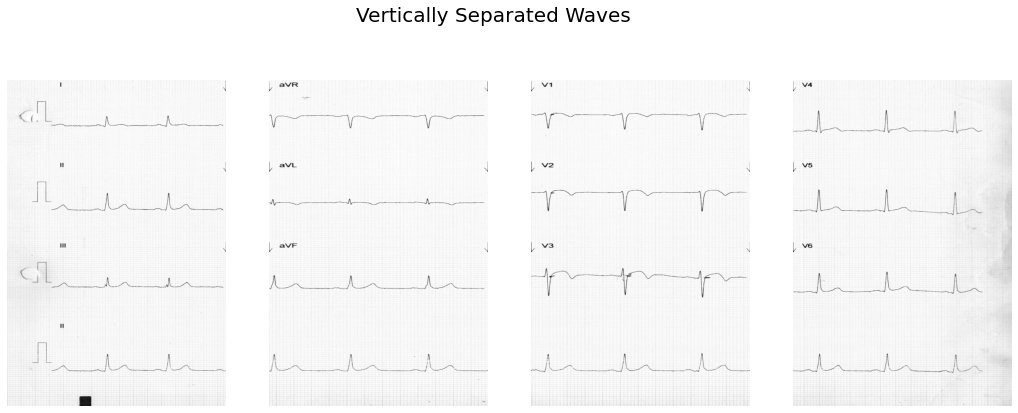

In [132]:
### Plot
fig, ax = plt.subplots(1, 4, figsize = (18, 6))

### Images
imx_temp = clean_imx[:, :reference_bar + v_separations[0]]
im_temp = Image.fromarray(imx_temp)
ax[0].imshow(im_temp.reduce(2), cmap='gray', aspect='auto')
ax[0].get_xaxis().set_visible(False)
ax[0].get_yaxis().set_visible(False)
[ax[0].spines[spine].set_visible(False) for spine in ax[0].spines];

imx_temp = clean_imx[:, (reference_bar + v_separations[0]):(reference_bar + v_separations[1])]
im_temp = Image.fromarray(imx_temp)
ax[1].imshow(im_temp.reduce(2), cmap='gray', aspect='auto')
ax[1].get_xaxis().set_visible(False)
ax[1].get_yaxis().set_visible(False)
[ax[1].spines[spine].set_visible(False) for spine in ax[0].spines];

imx_temp = clean_imx[:, (reference_bar + v_separations[1]):(reference_bar + v_separations[2])]
im_temp = Image.fromarray(imx_temp)
ax[2].imshow(im_temp.reduce(2), cmap='gray', aspect='auto')
ax[2].get_xaxis().set_visible(False)
ax[2].get_yaxis().set_visible(False)
[ax[2].spines[spine].set_visible(False) for spine in ax[0].spines];

imx_temp = clean_imx[:, (reference_bar + v_separations[2]):]
im_temp = Image.fromarray(imx_temp)
ax[3].imshow(im_temp.reduce(2), cmap='gray', aspect='auto')
ax[3].get_xaxis().set_visible(False)
ax[3].get_yaxis().set_visible(False)
[ax[3].spines[spine].set_visible(False) for spine in ax[0].spines];

### Title
plt.suptitle('Vertically Separated Waves', fontsize = 20, y = 1.05);

#### Cropping the scale reference

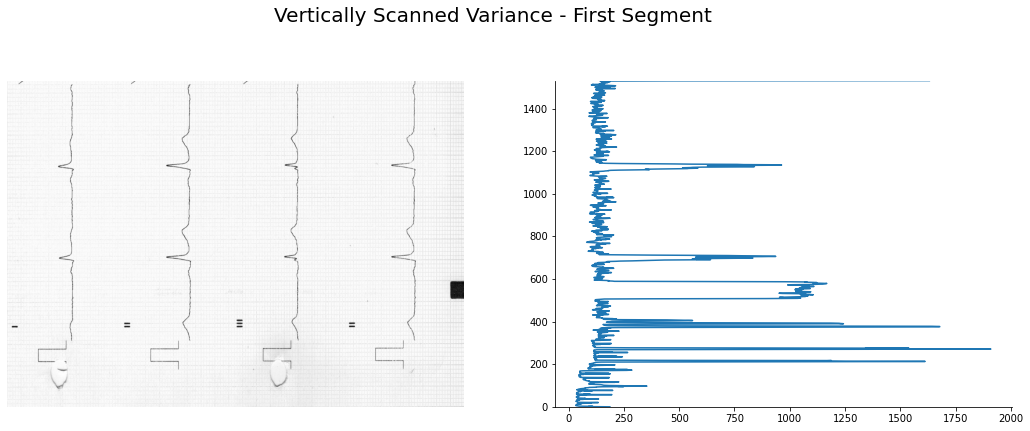

In [133]:
imx_temp = clean_imx[:, :reference_bar + v_separations[0]]
im_temp = Image.fromarray(imx_temp)
h_var = imx_temp.var(0)

### Plot
fig, ax = plt.subplots(1,2,figsize = (18,6))

### Image
ax[0].imshow(im_temp.reduce(2).rotate(90, expand=True), cmap='gray', aspect='auto')
ax[0].get_xaxis().set_visible(False)
ax[0].get_yaxis().set_visible(False)
[ax[0].spines[spine].set_visible(False) for spine in ax[0].spines];

### Variance
ax[1].plot(h_var[::-1], range(imx_temp.shape[1])[::-1])
# ax[1].invert_yaxis()
ax[1].margins(y=0)
ax[0].get_xaxis().set_visible(False)
[ax[1].spines[spine].set_visible(False) for spine in ['right', 'top']];

### Title
plt.suptitle('Vertically Scanned Variance - First Segment', fontsize = 20, y = 1.05);

In [134]:
### Previous calculations and definitions
imx_temp = clean_imx[:, :reference_bar + v_separations[1]]
imx_temp = clean_imx
im_temp = Image.fromarray(imx_temp)
h_var = imx_temp.var(0)

## The following lines were used to obtain the vertical
## separations. Take a look a the following note for detail
# scale_separations = np.argpartition(h_var, -10)[-10:]
# scale_separations = np.sort(scale_separations)
# scale_separations = scale_separations[:2]

#### Note:
Same as the previous note.

In [135]:
scale_separations = ecg.scale_separations_f1
scale_separations

array([213, 271], dtype=int64)

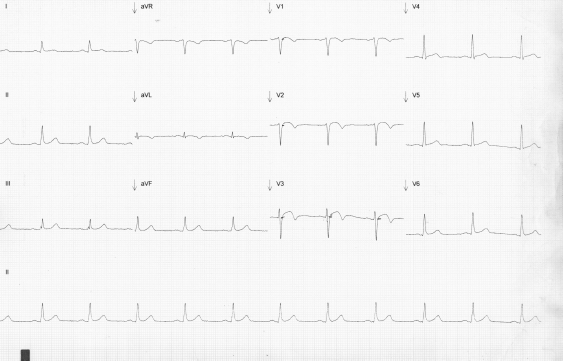

In [136]:
little_part = ecg.little_part_f1
imx_scale = imx_temp[:, :scale_separations[1]+little_part] #Store the scale

nclean_imx = imx_temp[:, scale_separations[1]+little_part:] #New clean image
im_temp = Image.fromarray(nclean_imx)
im_temp.reduce(ecg.img_factor)

In [137]:
### Previous calculations and definitions
reference_bar = ecg.reference_bar_f1 # Approx
h_var = nclean_imx[:, reference_bar:].var(0)
imx_temp = nclean_imx[:, reference_bar:]
im_temp = Image.fromarray(imx_temp)

v_separations = np.argpartition(h_var, -3)[-3:]
v_separations = np.sort(v_separations)

#### Note:
Same as the previous note.

In [138]:
nv_separations = ecg.nv_separations_f1
nv_separations

array([ 721, 1938, 3162], dtype=int64)

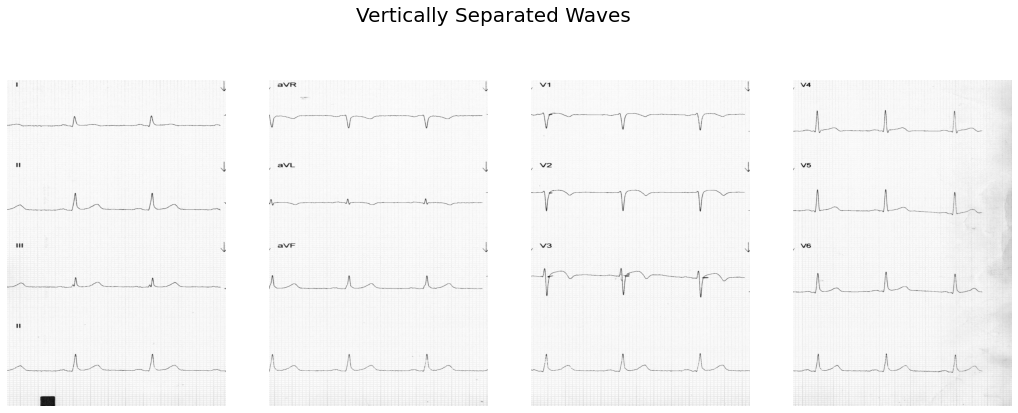

In [139]:
### Plot
fig, ax = plt.subplots(1, 4, figsize = (18, 6))

### Images
imx_temp = nclean_imx[:, :reference_bar + nv_separations[0]]
im_temp = Image.fromarray(imx_temp)
ax[0].imshow(im_temp.reduce(2), cmap='gray', aspect='auto')
ax[0].get_xaxis().set_visible(False)
ax[0].get_yaxis().set_visible(False)
[ax[0].spines[spine].set_visible(False) for spine in ax[0].spines];

imx_temp = nclean_imx[:, (reference_bar + nv_separations[0]):(reference_bar + nv_separations[1])]
im_temp = Image.fromarray(imx_temp)
ax[1].imshow(im_temp.reduce(2), cmap='gray', aspect='auto')
ax[1].get_xaxis().set_visible(False)
ax[1].get_yaxis().set_visible(False)
[ax[1].spines[spine].set_visible(False) for spine in ax[0].spines];

imx_temp = nclean_imx[:, (reference_bar + nv_separations[1]):(reference_bar + nv_separations[2])]
im_temp = Image.fromarray(imx_temp)
ax[2].imshow(im_temp.reduce(2), cmap='gray', aspect='auto')
ax[2].get_xaxis().set_visible(False)
ax[2].get_yaxis().set_visible(False)
[ax[2].spines[spine].set_visible(False) for spine in ax[0].spines];

imx_temp = nclean_imx[:, (reference_bar + nv_separations[2]):]
im_temp = Image.fromarray(imx_temp)
ax[3].imshow(im_temp.reduce(2), cmap='gray', aspect='auto')
ax[3].get_xaxis().set_visible(False)
ax[3].get_yaxis().set_visible(False)
[ax[3].spines[spine].set_visible(False) for spine in ax[0].spines];

### Title
plt.suptitle('Vertically Separated Waves', fontsize = 20, y = 1.05);

We store each column:

In [140]:
leads = dict()
leads[0] = nclean_imx[:, :reference_bar + nv_separations[0]]
leads[1] = nclean_imx[:, (reference_bar + nv_separations[0]):(reference_bar + nv_separations[1])]
leads[2] = nclean_imx[:, (reference_bar + nv_separations[1]):(reference_bar + nv_separations[2])]
leads[3] = nclean_imx[:, (reference_bar + nv_separations[2]):]

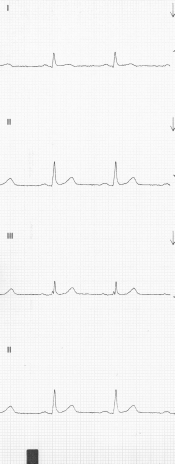

In [141]:
Image.fromarray(leads[0]).reduce(7)

## Extracting waveform

Commence from the image loading, but we will keep the color dimensions in a different variable

In [186]:
img = Image.open(png_path)
imx = np.array(img)
# imx = imx[:,:,0]
imx = np.rot90(imx, k=3)

clean_imx = imx[crop_after_pqrst:crop_before_end,:]
imx_scale = clean_imx[:, :scale_separations[1]+little_part] #Store the scale
nclean_imx = clean_imx[:, scale_separations[1]+little_part:] #New clean image

leads_c = dict()
leads_c[0] = nclean_imx[:, :reference_bar + nv_separations[0]]
leads_c[1] = nclean_imx[:, (reference_bar + nv_separations[0]):(reference_bar + nv_separations[1])]
leads_c[2] = nclean_imx[:, (reference_bar + nv_separations[1]):(reference_bar + nv_separations[2])]
leads_c[3] = nclean_imx[:, (reference_bar + nv_separations[2]):]

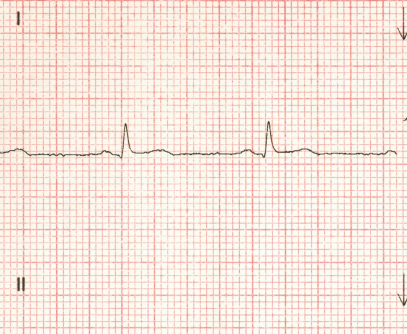

In [187]:
##### Original image
lead_i = leads_c[0][:1000]
Image.fromarray(lead_i).reduce(3)

In [188]:
# aux = leads_c[0]
# aux[:,:,1] = 0
# aux[:,:,2] = 0
# Image.fromarray(aux).reduce(3)

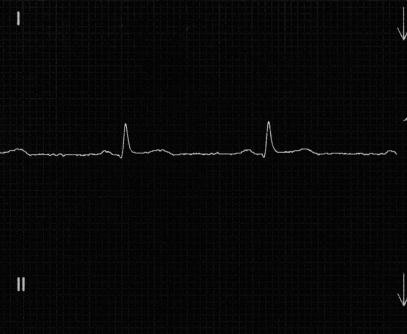

In [189]:
##### a) Invert palette
lead_i_0 = leads[0][:1000]
lead_i_a = np.abs(lead_i_0.copy().astype(int) - 255).astype(np.uint8)
Image.fromarray(lead_i_a).reduce(3)

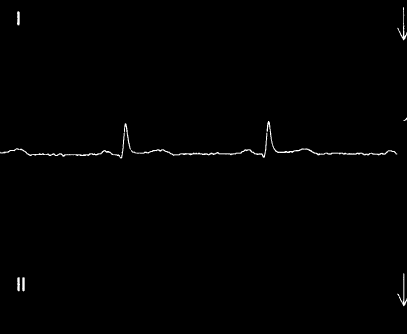

In [217]:
##### b) Otsu Thresholding 
### https://www.geeksforgeeks.org/python-thresholding-techniques-using-opencv-set-3-otsu-thresholding/#:~:text=In%20Otsu%20Thresholding%2C%20a%20value,both%20the%20histogram%20peak%20values.
_, lead_i_b = cv2.threshold(lead_i_a.copy(), 120, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)     
Image.fromarray(lead_i_b).reduce(3)

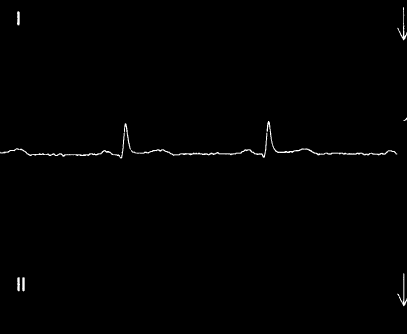

In [218]:
##### c) Connectivity Algorithms
### Skipped for now
lead_i_c = lead_i_b.copy()
Image.fromarray(lead_i_c).reduce(3)

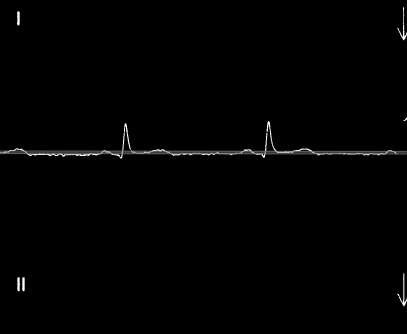

In [351]:
##### d) Hough Line Detection
### https://docs.opencv.org/3.4/d3/de6/tutorial_js_houghlines.html
lead_i_d = lead_i_c.copy()

lines = cv2.HoughLines(lead_i_c, 1, np.pi/30, 150, min_theta = 10*np.pi/20, max_theta = 11*np.pi/20)

if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho        
        pt1 = (int(x0 + 0*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - lead_i_d.shape[1]*(-b)), int(y0 - 1000*(a)))
        cv2.line(lead_i_d, pt1, pt2, (120,100,178, 20), 1, cv2.LINE_AA)

Image.fromarray(lead_i_d).reduce(3)

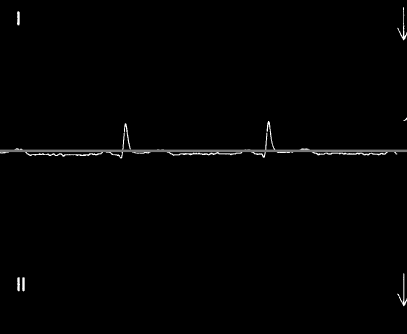

In [357]:
##### e) Average
lead_i_e = lead_i_c.copy()

avg_r_theta = lines[:, 0].mean(0) ### Is it correct to do this? Maybe not
avg_r_theta = lines[:, 0].mean(0) ### Is it correct to do this? Maybe not

rho = avg_r_theta[0]
theta = avg_r_theta[1]
a = math.cos(theta)
b = math.sin(theta)
x0 = a * rho
y0 = b * rho        

pt1_star = (0, int((pt1[1] + pt2[1])/2))
pt2_star = (lead_i_e.shape[1], int((pt1[1] + pt2[1])/2))

cv2.line(lead_i_e, pt1_star, pt2_star, (120,100,178, 20), 5, cv2.LINE_AA)

Image.fromarray(lead_i_e).reduce(3)